In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
from collections import defaultdict


class NetworkSpreader:
    def __init__(self, N, m, prob, seed=None):
        random.seed(seed)
        self.G = nx.barabasi_albert_graph(N, m, seed)
        self.infected = []
        self.step = 0
        assert prob <= 1
        self.prob = prob
        self.data = defaultdict(list)

    def collectData(self):
        self.data['Step'].append(self.step-1)
        self.data['Infection_Count'].append(len(self.infected))
        self.data['Infection_Fraction'].append(
            len(self.infected)/self.G.number_of_nodes())

    def infectNode(self, u):
        if u not in self.infected:
            self.infected.append(u)
            if self.plot:
                if self.step == 0:
                    self.colors = [set([u])]
                while len(self.colors) <= self.step:
                    self.colors.append(self.colors[-1].copy())
                self.colors[-1].add(u)
        if self.plot:
            while len(self.colors) <= self.step:
                self.colors.append(self.colors[-1].copy())

    def takeStep(self):
        if self.step == 0:
            self.infectNode(random.randint(0, self.G.number_of_nodes()-1))
        else:
            nn = self.G.edges(self.infected)
            for n in nn:
                u = random.random()
                if u < self.prob:
                    self.infectNode(n[0])
                    self.infectNode(n[1])
        self.step += 1

    def _anim(self, i):
        self.ax.clear()
        c = ['tab:red' if n in self.colors[i]
             else 'tab:blue' for n in range(self.G.number_of_nodes())]
        nx.draw_kamada_kawai(self.G, node_color=c, with_labels=True)

    def _run_animated(self, step, inter):
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        for i in range(step):
            self.takeStep()
            self.collectData()
        anim = matplotlib.animation.FuncAnimation(
            self.fig, self._anim, frames=len(self.colors), interval=inter, repeat=True)
        return HTML(anim.to_jshtml())

    def _run_static(self, step):
        for i in range(step):
            self.takeStep()
            self.collectData()

    def run(self, step, plot=False, inter=200):
        self.plot = plot
        if self.plot:
            ani = self._run_animated(step, inter)
            return self.data, ani
        else:
            self._run_static(steps)
            return self.data

- 'n' Number of nodes in the graph
- 'm' Number of new conncetions when a node is added (cf http://barabasi.com/f/66.pdf)
- 'steps' Number of infection iterations / days
- 'r' Probability to infect a neighbor
- if 'plot==True' the run function will return an animation object which can be played

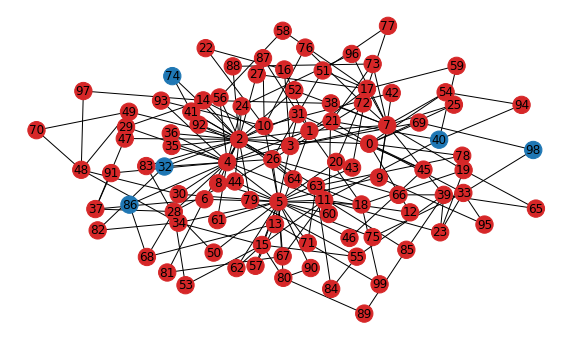

In [2]:
n = 100
m = 2
steps = 10
r = 0.33
s = NetworkSpreader(n, m, r, seed=11)
_, anim = s.run(steps, plot=True)
anim

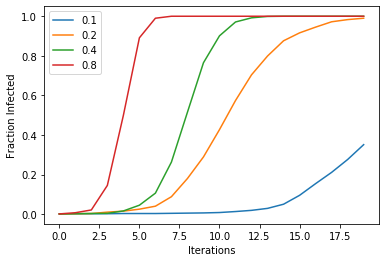

In [3]:
n = 1000
m = 2
steps = 20 
for r in (0.1,0.2,0.4,0.8):
    s = NetworkSpreader(n, m, r)
    data = s.run(steps, False)
    plt.plot(data['Step'], data['Infection_Fraction'], label=r)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fraction Infected');

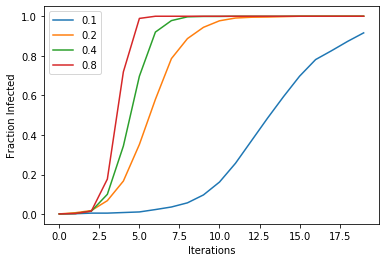

In [4]:
n = 1000
m = 3
steps = 20 
for r in (0.1,0.2,0.4,0.8):
    s = NetworkSpreader(n, m, r)
    data = s.run(steps, False)
    plt.plot(data['Step'], data['Infection_Fraction'], label=r)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fraction Infected');